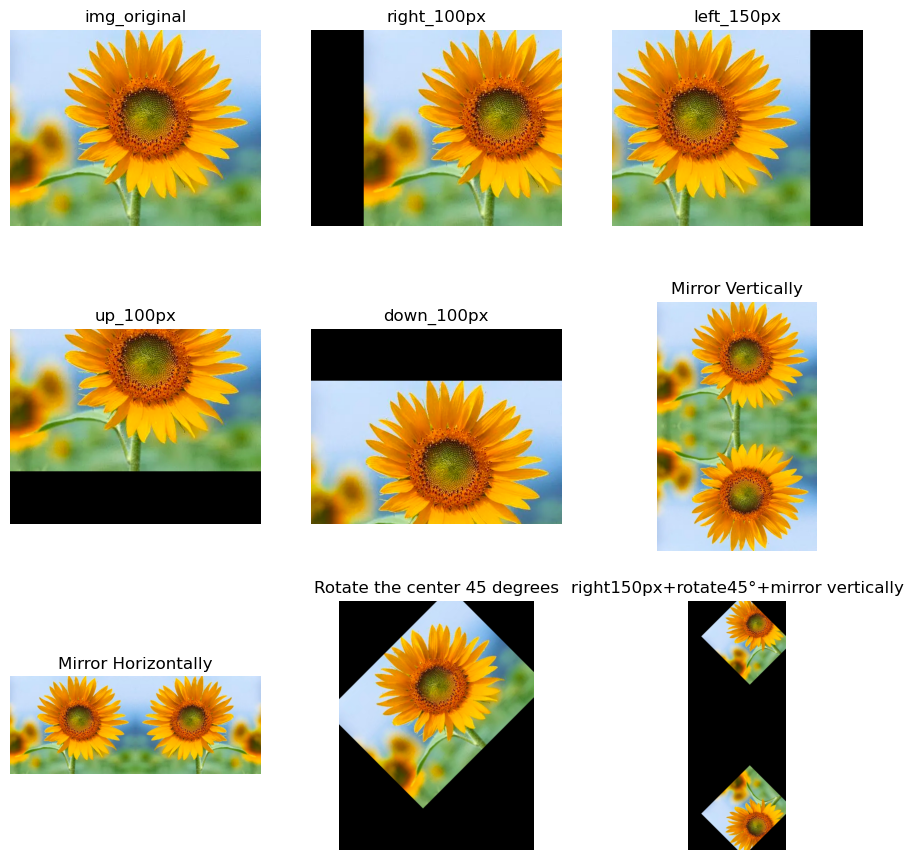

In [10]:
#  姓名：王安文
#  学号：122106010768
#  作业名：几何运算实验
#  课程：图像分析基础
#  作业实现内容：实现图像的平移，镜像，旋转 以及符合它们的变换
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
# 左右平移函数的实现  right>=0向右，right<0向左
def move_LeftAndRight(right, img):
    imginfo = img.shape
    result = np.zeros(imginfo, np.uint8)
    if right>=0:
        for i in range(imginfo[0]):
            for j in range(imginfo[1]-right):
                result[i, j+right] = img[i, j]
    if right<0:
          for i in range(imginfo[0]):
            for j in range(-right,imginfo[1]):
                result[i, j+right] = img[i, j]
    return result
# 上下平移函数的实现 up>=0表示向上，up<0表示向下
def move_UpAndDown(up, img):
    imginfo = img.shape
    result = np.zeros(imginfo, np.uint8)
    if up>=0:
        for i in range(up,imginfo[0]):
            for j in range(imginfo[1]):
                result[i-up, j] = img[i, j]
    if up<0:
        for i in range(imginfo[0]+up):
            for j in range(imginfo[1]):
                result[i-up, j] = img[i, j]
    return result
# 垂直镜像函数的实现
def h_acous_tic(img):
    imginfo = img.shape
    result = np.zeros([imginfo[0] * 2, imginfo[1], imginfo[2]], np.uint8)

    for i in range(imginfo[0]):
        for j in range(imginfo[1]):
            result[i, j] = img[i, j]
            result[imginfo[0] * 2 - i - 1, j] = img[i, j]
    return result
# 水平镜像函数的实现
def w_acous_tic(img):
    imginfo = img.shape
    result = np.zeros([imginfo[0], imginfo[1] * 2, imginfo[2]], np.uint8)
    for i in range(imginfo[0]):
        for j in range(imginfo[1]):
            result[i, j] = img[i, j]
            result[i, 2*imginfo[1]-1-j] = img[i, j]
    return result

# 旋转函数的视线
def matrotate(img):
    imginfo = img.shape
    martix = cv2.getRotationMatrix2D((imginfo[0] * 0.5, imginfo[1] * 0.5), 45, 0.7)
    result = cv2.warpAffine(img, martix, (imginfo[0], imginfo[1]))
    return result

# 复合函数 同时右移150px+旋转+垂直镜像
def all_function(img):
    move1 = move_LeftAndRight(150, img)
    matrotate1 = matrotate(move1)
    return h_acous_tic(matrotate1)

if __name__ == "__main__":
    img_in = cv2.imread("flower.jpg", 1)
    # 图片向右移动100个像素
    moveright_img = move_LeftAndRight(100, img_in)[:, :, ::-1]
    # 向左平移150个像素
    moveleft_img = move_LeftAndRight(-100, img_in)[:, :, ::-1]
    # 向上平移100个像素
    moveup_img = move_UpAndDown(100, img_in)[:, :, ::-1]
    # 向下平移100个像素
    movedown_img = move_UpAndDown(-100, img_in)[:, :, ::-1]
    # 图片垂直镜像 和水平镜像
    h_acous_tic_img = h_acous_tic(img_in)[:, :, ::-1]
    w_acous_tic_img = w_acous_tic(img_in)[:, :, ::-1]
    # 图片旋转45度
    matrotate_img = matrotate(img_in)[:, :, ::-1]
    # 调用三种变换的符合函数
    last_img = all_function(img_in)[:, :, ::-1]
    plt.figure(figsize=(11, 11))
    plt.subplot(331), plt.imshow(img_in[:, :, ::-1])
    plt.title('img_original'), plt.axis('off')
    plt.subplot(332), plt.imshow(moveright_img, cmap='gray'),
    plt.title('right_100px'), plt.axis('off')
    plt.subplot(333), plt.imshow(moveleft_img, cmap='gray'),
    plt.title('left_150px'), plt.axis('off')
    plt.subplot(334), plt.imshow(moveup_img, cmap='gray'),
    plt.title('up_100px'), plt.axis('off')
    plt.subplot(335), plt.imshow(movedown_img, cmap='gray'),
    plt.title('down_100px'), plt.axis('off')
    plt.subplot(336), plt.imshow(h_acous_tic_img, cmap='gray'),
    plt.title('Mirror Vertically'), plt.axis('off')
    plt.subplot(337), plt.imshow(w_acous_tic_img, cmap='gray'),
    plt.title('Mirror Horizontally'), plt.axis('off')
    plt.subplot(338), plt.imshow(matrotate_img, cmap='gray'),
    plt.title('Rotate the center 45 degrees'), plt.axis('off')
    plt.subplot(339), plt.imshow(last_img, cmap='gray'),
    plt.title('right150px+rotate45°+mirror vertically'), plt.axis('off')
    plt.show()